# Credit Risk Modeling: Preprocessing 

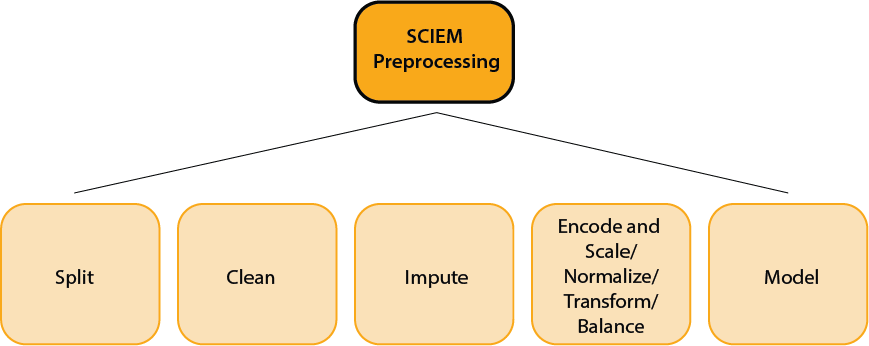

## 1.0 Basic Exploratory Data Analysis

#### 1.1 Import Libraries

In [1178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import re
from gensim.models import Word2Vec
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    OrdinalEncoder, OneHotEncoder, LabelEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Import Data

In [1181]:
df = pd.read_csv('loans_full_schema.csv')

#### 1.3 Review Data

In [1184]:
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [1186]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

In [1188]:
test = df.select_dtypes(include=np.number)
test.shape[1]

42

In [1190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## 2.0 Data Preprocessing I

In [1193]:
clean_df = df.copy()

In [1195]:
text_features = clean_df['emp_length'] 
all_categorical_columns = clean_df.select_dtypes(include='object')

categorical_columns = [col for col in all_categorical_columns if col not in text_features]
numerical_columns = clean_df.select_dtypes(np.number).columns

### 2.1 Duplicate Values
No preprocessing of duplicate values is required. 

In [1198]:
clean_df.duplicated().sum()

0

### 2.2 Data type conversions

In [1201]:
clean_df['issue_month'] = pd.to_datetime(clean_df['issue_month'], format='%b-%Y')
for col in numerical_columns:
    numerical_columns = pd.to_numeric(numerical_columns, errors='coerce')

### 2.3 String standardization

In [1204]:
categorical_columns = clean_df.select_dtypes(include='object')
for col in categorical_columns:
    clean_df[col] = clean_df[col].str.lower().str.strip()

clean_df['term'] = clean_df['term'].astype('object')

In [1214]:
test1=clean_df[['verification_income_joint', 'debt_to_income_joint', 'annual_income_joint']]
test1

,verification_income_joint,debt_to_income_joint,annual_income_joint
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,verified,37.66,57000.0
...,...,...,...
9995,NaN,NaN,NaN
9996,NaN,NaN,NaN
9997,source verified,29.57,107000.0
9998,NaN,NaN,NaN


#### 2.2.1 emp_title

__Strategy 1: Word2Vec__

In [1217]:
# --- Step 1: Preprocessing and Tokenization ---
clean_df['emp_title_processed'] = clean_df['emp_title'].fillna('Unknown')

# IMPORTANT: Apply the more robust tokenization function from previous examples
def tokenize_job_title(title):
    if pd.isna(title):
        return [] # Return empty list for NaN/None titles
    title = str(title).lower()
    title = re.sub(r'[^a-z\s]', '', title) # Remove special characters and numbers
    words = [word for word in title.split() if word]
    return words

# Assign the tokenized lists to a new column in clean_df
clean_df['tokenized_job_title'] = clean_df['emp_title_processed'].apply(tokenize_job_title)

# The 'sentences' for Word2Vec are now directly from this new column
sentences = clean_df['tokenized_job_title'].tolist()

In [1219]:
# --- Step 2: Train the Word2Vec Model ---
model = Word2Vec(
    sentences=sentences,
    vector_size=100,      # Dimensionality of the embedding vectors (e.g., 50, 100, 200)
    window=4,             # Context window size (how many words around the target word to consider)
    min_count=1,          # Minimum frequency for a word to be included in the vocabulary
    sg=0,                 # 1 for Skip-gram (better for infrequent words), 0 for CBOW
    epochs=100,           # Number of training iterations
    workers=4             # Number of CPU cores to use
)

print(f"\nVocabulary size: {len(model.wv.index_to_key)} unique words")


Vocabulary size: 2345 unique words


In [1220]:
# --- Step 3: Create Mapping and Helper Functions ---
# Create a mapping from word to its embedding vector
word_to_embedding = {word: model.wv[word] for word in model.wv.index_to_key}
vector_dim = model.wv.vector_size

# Function to get embedding for a single word, handling OOV
def get_word_embedding(word, embedding_map, vector_size):
    if word in embedding_map:
        return embedding_map[word]
    else:
        # Handle out-of-vocabulary (OOV) words:
        # Return a zero vector, or an average of all embeddings, or a dedicated <UNK> token embedding.
        return [0.0] * vector_size

# Function to get an aggregated embedding for an entire job title
def get_job_title_embedding(tokenized_title_words, embedding_map, vector_size):
    word_embeddings_list = []
    for word in tokenized_title_words:
        embedding = get_word_embedding(word, embedding_map, vector_size)
        if any(x != 0.0 for x in embedding): # Only add if not an OOV zero vector
            word_embeddings_list.append(embedding)

    if not word_embeddings_list: # If the title was empty or all words were OOV
        return [0.0] * vector_size
    else:
        # Aggregation Strategy: Mean Pooling (most common)
        return list(np.mean(word_embeddings_list, axis=0))


In [1223]:
# --- Step 4: Apply Embeddings to DataFrame ---
# Apply the aggregation function to your tokenized job titles column
# Use clean_df consistently
clean_df['job_title_embedding'] = clean_df['tokenized_job_title'].apply(
    lambda x: get_job_title_embedding(x, word_to_embedding, vector_dim)
)

# Expand the list of embeddings into separate columns
job_title_embedding_df = pd.DataFrame(
    clean_df['job_title_embedding'].tolist(),
    index=clean_df.index,
    columns=[f'job_embed_{i}' for i in range(vector_dim)]
)

# Concatenate with your original DataFrame (clean_df),
# dropping the original 'emp_title', 'emp_title_processed', 'tokenized_job_title', and 'job_title_embedding'
# Keep 'employee_id' and 'some_other_feature'
clean_df = pd.concat([
    clean_df.drop(columns=['emp_title', 'emp_title_processed', 'tokenized_job_title', 'job_title_embedding']),
    job_title_embedding_df
], axis=1)

print("\nDataFrame with Job Title Embeddings:")
print(clean_df.head())
print(f"Shape of encoded DataFrame: {clean_df.shape}")


DataFrame with Job Title Embeddings:
   emp_length state homeownership  annual_income  verified_income  \
0         3.0    nj      mortgage        90000.0         verified   
1        10.0    hi          rent        40000.0     not verified   
2         3.0    wi          rent        40000.0  source verified   
3         1.0    pa          rent        30000.0     not verified   
4        10.0    ca          rent        35000.0         verified   

   debt_to_income  annual_income_joint verification_income_joint  \
0           18.01                  NaN                       NaN   
1            5.04                  NaN                       NaN   
2           21.15                  NaN                       NaN   
3           10.16                  NaN                       NaN   
4           57.96              57000.0                  verified   

   debt_to_income_joint  delinq_2y  months_since_last_delinq  \
0                   NaN          0                      38.0   
1         

### 2.3 Split Data

In [1226]:
X = clean_df.drop(columns=['loan_status'])
y = clean_df['loan_status']

In [1228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [1230]:
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()


In [1232]:
test2=clean_df[['verification_income_joint', 'debt_to_income_joint', 'annual_income_joint']]
test2

,verification_income_joint,debt_to_income_joint,annual_income_joint
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,verified,37.66,57000.0
...,...,...,...
9995,NaN,NaN,NaN
9996,NaN,NaN,NaN
9997,source verified,29.57,107000.0
9998,NaN,NaN,NaN


### 2.4. Missing Values

My strategy for handling the missing data is informed by the follow:
1. Percentage of Missing Data: A higher percentage might lean towards dropping the column or more sophisticated imputation.

2. Nature of the Column: Is it numerical or categorical? What does "missing" actually mean in the context of that specific variable?

3. Importance to the Model: Is this column likely to be a strong predictor for your target variable (loan_status)?

4. Assumptions about Missingness: Is the data Missing Completely At Random (MCAR), Missing At Random (MAR), or Missing Not At Random (MNAR)

In [1235]:
df_missing = X_train_processed.isna().sum().to_frame().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False)
df_missing['pct'] = round(df_missing['count'] / len(X_train_processed) * 100, 3)
missing_df = df_missing[df_missing['count'] > 0]
missing_df

,count,pct
verification_income_joint,6842,85.525
annual_income_joint,6809,85.112
debt_to_income_joint,6809,85.112
months_since_90d_late,6182,77.275
months_since_last_delinq,4541,56.762
months_since_last_credit_inquiry,1032,12.900
emp_length,660,8.250
num_accounts_120d_past_due,263,3.288
debt_to_income,21,0.262


#### 2.4.0 num_accounts_120d_past_due

A column such as,`num_accounts_120d_past_due`, has invariant values. Therefore, it provides no discriminatory power or predictive information for the model. Including this column would only add unnecessary dimensionality to the dataset, potentially increasing computational load without contributing any analytical value. Therefore, the num_accounts_120d_past_due column has been removed to streamline the dataset.

In [1239]:
X_train_processed['num_accounts_120d_past_due'].describe()

count    7737.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: num_accounts_120d_past_due, dtype: float64

In [1241]:
column_to_drop = 'num_accounts_120d_past_due' 

if column_to_drop in X_train_processed:
    X_train_processed = X_train_processed.drop(['num_accounts_120d_past_due' ], axis=1)

    if column_to_drop in X_test_processed:
        X_test_processed = X_test_processed.drop(['num_accounts_120d_past_due'], axis=1)
    
    else:
        print(f"Warning: '{column_to_drop}' not found in X_test.")

else:
    print(f"Warning: '{column_to_drop}' not found in X_train.")

#### 2.3.1 Creating new column df[__is_joint_applicant__]

The "joint" columns [[`verification_income_joint`,`debt_to_income_joint`,`annual_income_joint`]] had a very high percentage of missing values. By creating is_joint_applicant, I've effectively transformed these missing values into meaningful information: if all three joint columns are missing, it strongly indicates an individual application, which is now explicitly represented by False (or 0). This avoids the need for complex imputation strategies for those specific columns if their primary purpose is just to flag joint applications.

In [1245]:
joint_columns = ['verification_income_joint', 'debt_to_income_joint', 'annual_income_joint'] 

if all(col in X_train_processed.columns for col in joint_columns):
    X_train_processed['is_joint_applicant'] = X_train_processed[joint_columns].notna().any(axis=1)
    X_train_processed['is_joint_applicant'] = X_train_processed['is_joint_applicant'].astype(int)
    print(X_train_processed['is_joint_applicant'].value_counts(normalize=True))

    
    X_train_processed = X_train_processed.drop(columns=joint_columns)

else:
    missing_cols = [col for col in joint_columns if col not in X_train_processed.columns]
    print(f"Warning: Not all joint columns found in X_train. Missing: {missing_cols}")


if all(col in X_test_processed.columns for col in joint_columns):
    print(f"\nAll joint columns found. Creating '{new_flag_column_name}' in X_test_processed.")
    X_test_processed['is_joint_applicant'] = X_test_processed[joint_columns].notna().any(axis=1)
    X_test_processed['is_joint_applicant'] = X_test_processed['is_joint_applicant'].astype(int)
    print(X_test_processed['is_joint_applicant'].value_counts(normalize=True))
    
    X_test_processed = X_test_processed.drop(columns=joint_columns)
else:
    missing_cols_test = [col for col in joint_columns if col not in X_test_processed.columns]
    print(f"\nWarning: Not all joint columns found in X_test. Missing: {missing_cols_test}")


is_joint_applicant
0    0.851125
1    0.148875
Name: proportion, dtype: float64

All joint columns found. Creating 'is_joint_applicant' in X_test_processed.
is_joint_applicant
0    0.848
1    0.152
Name: proportion, dtype: float64


In [ ]:
X_train_processed.shape

The `is_joint_applicant` column now effectively captures the core information needed from the "joint" columns: whether or not an applicant is joint. Given that fewer features mean a simpler model, faster training times, and fewer issues with multicollinearity I will now drop the original "joint" columns from the dataset.

#### 2.3.2 emp_length

In [ ]:
X_train_processed['emp_length'].describe()

In [ ]:
features_for_imputation = ['emp_length']

cols_to_process_train = [col for col in features_for_imputation if col in X_train_processed.columns]
cols_to_process_test = [col for col in features_for_imputation if col in X_test_processed.columns]


if cols_to_process_train:

    scaler = StandardScaler()
    imputer = KNNImputer(n_neighbors=5, weights='uniform')

    data_for_imputation_train = X_train_processed[cols_to_process_train]

    # Scale Train Data
    scaled_data_train = scaler.fit_transform(data_for_imputation_train)
    scaled_df_train = pd.DataFrame(scaled_data_train, columns=cols_to_process_train, index=data_for_imputation_train.index)

    # Impute Train Data
    imputed_scaled_data_train = imputer.fit_transform(scaled_df_train)
    imputed_scaled_df_train = pd.DataFrame(imputed_scaled_data_train, columns=cols_to_process_train, index=data_for_imputation_train.index)

    # Reverse Scaling
    imputed_original_scale_data_train = scaler.inverse_transform(imputed_scaled_df_train)
    imputed_clean_df_part_train = pd.DataFrame(imputed_original_scale_data_train, columns=cols_to_process_train, index=data_for_imputation_train.index)

    # Update X_train_processed
    for col in cols_to_process_train:
        X_train_processed[col] = imputed_clean_df_part_train[col]

    

    if cols_to_process_test:

        
        data_for_imputation_test = X_test_processed[cols_to_process_test]

        # Scale Test data
        scaled_data_test = scaler.transform(data_for_imputation_test)
        scaled_df_test = pd.DataFrame(scaled_data_test, columns=cols_to_process_test, index=data_for_imputation_test.index)


        # Impute Test Data
        imputed_scaled_data_test = imputer.transform(scaled_df_test)
        imputed_scaled_df_test = pd.DataFrame(imputed_scaled_data_test, columns=cols_to_process_test, index=data_for_imputation_test.index)


        # Reverse Scaling
        imputed_original_scale_data_test = scaler.inverse_transform(imputed_scaled_df_test)
        imputed_clean_df_part_test = pd.DataFrame(imputed_original_scale_data_test, columns=cols_to_process_test, index=data_for_imputation_test.index)


        # 5. Update X_test_processed 
        for col in cols_to_process_test:
            X_test_processed[col] = imputed_clean_df_part_test[col]


#### 2.3.4 debt_to_income

In [ ]:
X_train_processed['debt_to_income'].describe()

In [ ]:
median_impute_column = 'debt_to_income'

if median_impute_column in X_train_processed.columns:
    median_value = X_train_processed[median_impute_column].median()
    print(f"Calculated median for '{median_impute_column}' from X_train: {median_value}")

    X_train_processed[median_impute_column] = X_train_processed[median_impute_column].fillna(median_value)

    # Apply the calculated median to the test data
    if median_impute_column in X_test_processed.columns:
        median_value = X_test_processed[median_impute_column].median()
        X_test_processed[median_impute_column] = X_test_processed[median_impute_column].fillna(median_value)
        print(f"Calculated median for '{median_impute_column}' from X_test: {median_value}")
else:
    print(f"Warning: '{median_impute_column}' not found in X_train for median imputation.")


#### __Sentinel Values__
The column `months_since_90d_late` and `months_since_last_delinq` columns are missing 77.15% and 56.58% of their values respectively. It's highly probable that a missing value here means the individual has never been 90 days late or has never had a delinquency. I will impute with a value larger than the maximum observed value in the non-missing data allowing the model to distinguish between "actual delinquency x months ago" and "never delinq."

#### 2.3.5 months_since_90d_late column

In [ ]:
clean_df['months_since_90d_late'].unique()

In [ ]:
print(f'Max value in column months_since_90d_late before sentinel value imputation: {X_train_processed['months_since_90d_late'].max()}')


#### 2.3.6 months_since_last_delinq column

In [ ]:
clean_df['months_since_last_delinq'].unique()

In [ ]:
print(f'Max value in column months_since_last_delinq column before sentinel value imputation: {X_train_processed['months_since_last_delinq'].max()}')


In [ ]:
late_delinq_columns = ['months_since_90d_late', 'months_since_last_delinq']

if [col for col in late_delinq_columns if col in X_train_processed.columns]:
    for col in late_delinq_columns:
        X_train_processed[col] = X_train_processed[col].fillna(999)

else:
    missing_cols_train = [col for col in late_delinq_columns if col not in X_train_processed.columns]
    print(f'\nWarning: Not all joint columns found in X_train. Missing: {missing_cols_train}')

if [col for col in late_delinq_columns if col in X_test_processed.columns]:
    for col in late_delinq_columns:
        X_test_processed[col] = X_test_processed[col].fillna(999)
else:
    missing_column_test = [col for col in late_delinq_columns if col not in X_test_processed.columns]
    print(f'\nWarning: Not all late or delinquent columns found in X_test. Missing: {missing_cols_test}')
    

In [ ]:
X_train_processed['months_since_90d_late'].max()

In [ ]:
X_test_processed['months_since_last_delinq'].max()

#### 2.3.7 months_since_last_credit_inquiry

__Current__ and __Fully Paid__ have higher mean months_since_last_credit_inquiry values. This suggests that for loans that are actively being paid or have been fully paid off, the average time since their last credit inquiry is longer. This intuitively makes sense as stable borrowers might not need frequent new credit inquiries. __Charged Off__ , __Late (16-30 days)__,  __Late (31-120 days)__, and __In Grace Period__  generally show lower mean months_since_last_credit_inquiry values. This could indicate that borrowers who are struggling (late, in grace, or charged off) might have had more recent credit inquiries. This also makes sense as they might be seeking new credit or consolidating debt leading to more recent inquiries.
* It is important to note that there is a class imbalance in the target variable `loan_status`. Because __Current__ has the largest number of samples, its mean (7.41) is statistically more robust and representative of that group. The means for the minority classes (like 'Charged Off', 'In Grace Period', 'Late') are derived from much smaller sample sizes.

In [ ]:
mean_inquiry_by_status = clean_df.groupby('loan_status')['months_since_last_credit_inquiry'].mean().sort_values(ascending=False)
print("\nMean months_since_last_credit_inquiry by loan_status:")
mean_inquiry_by_status

In [ ]:
print("\nFrequency of each value:")
all_status_counts = clean_df['loan_status'].value_counts()
all_status_counts

In [ ]:
inquiry_column = 'months_since_last_credit_inquiry'

if inquiry_column in X_train_processed.columns:
    X_train_processed['months_since_last_credit_inquiry'] = X_train_processed['months_since_last_credit_inquiry'].fillna(999)

    if inquiry_column in X_test_processed.columns:
        X_test_processed['months_since_last_credit_inquiry'] = X_test_processed['months_since_last_credit_inquiry'].fillna(999)
    else:
        print(f'Warning: {inqury_column} not found in X_test.')
else:
    print(f'Warning: {inqury_column} not found in X_train.')

__Strategy 2: BERT__

In [ ]:
'''
import re
import torch
from transformers import AutoTokenizer, AutoModel


# Basic cleaning (optional but good practice to remove unnecessary noise)
def clean_job_title(title):
    if pd.isna(title):
        return ""
    title = str(title).lower()
    # Remove excessive whitespace, special characters might be kept or removed based on needs
    title = re.sub(r'\s+', ' ', title).strip()
    return title

clean_df['cleaned_job_title'] = clean_df['emp_title'].apply(clean_job_title)

# The list of job titles to process
job_titles = clean_df['cleaned_job_title'].tolist()
print("Cleaned Job Titles for BERT:")
for i, title in enumerate(job_titles[:5]):
    print(f"Row {i+1}: '{title}'")
'''

In [ ]:
'''
# Choose a pre-trained BERT model
bert = 'bert-base-uncased' # Or 'bert-base-cased', 'roberta-base', etc.

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(bert)
model = AutoModel.from_pretrained(bert)

# Set the model to evaluation mode (important for inference)
model.eval()

# Check if CUDA (GPU) is available and move model to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(f"\nUsing device: {device}")
'''

In [ ]:
'''
def get_bert_embeddings(texts, tokenizer, model, device, max_length=128, batch_size=32):
    all_embeddings = []
    
    # Process in batches to manage memory and speed up
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        
        # Tokenize the batch
        encoded_input = tokenizer(
            batch_texts,
            padding=True,          # Pad sequences to the longest sequence in the batch
            truncation=True,       # Truncate sequences longer than max_length
            max_length=max_length, # Max sequence length
            return_tensors='pt'    # Return PyTorch tensors
        )
        
        # Move inputs to the same device as the model
        input_ids = encoded_input['input_ids'].to(device)
        attention_mask = encoded_input['attention_mask'].to(device)
        
        with torch.no_grad(): # Disable gradient calculation for inference
            # Get model outputs (hidden states)
            # `last_hidden_state` is a tensor of shape (batch_size, sequence_length, hidden_size)
            # `pooler_output` is a tensor of shape (batch_size, hidden_size) and is the
            # representation of the [CLS] token, often used for sequence-level tasks.
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            
            # --- Aggregation Strategy ---
            # Option 1: Use the [CLS] token's embedding (pooler_output)
            # This is a common choice for getting a single sentence embedding
            batch_embeddings = outputs.pooler_output.cpu().numpy()
            
            # Option 2: Mean pooling of all token embeddings
            # This can sometimes be more robust than just the [CLS] token
            # token_embeddings = outputs.last_hidden_state # (batch_size, sequence_length, hidden_size)
            # input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
            # sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
            # sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
            # batch_embeddings = (sum_embeddings / sum_mask).cpu().numpy()
            
            all_embeddings.extend(batch_embeddings)
            
    return all_embeddings

# Generate embeddings for all job titles
bert_embeddings = get_bert_embeddings(
    job_titles,
    tokenizer,
    model,
    device,
    max_length=64, # Job titles are usually short, so a smaller max_length is fine
    batch_size=16  # Adjust based on your GPU memory and dataset size
)

print(f"\nGenerated {len(bert_embeddings)} embeddings, each with dimension: {len(bert_embeddings[0])}")
print("First embedding (first 5 values):", bert_embeddings[0][:5])
'''

In [ ]:
'''
# Convert list of embeddings to a DataFrame
embedding_df = pd.DataFrame(bert_embeddings, index=df.index,
                            columns=[f'bert_embed_{i}' for i in range(len(bert_embeddings[0]))])

# Concatenate with your original DataFrame, dropping the original text columns
clean_df_final = pd.concat([clean_df.drop(columns=['emp_title', 'cleaned_job_title']), embedding_df], axis=1)

print("\nFinal DataFrame with BERT Embeddings:")
print(clean_df_final.head())
print(f"Shape of final DataFrame: {clean_df_final.shape}")
'''

## 3.0  Data Transformation

In [ ]:
numerical_cols = ['emp_length', 'annual_income', 'debt_to_income', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'interest_rate', 'installment', 'balance', 'paid_total',
       'paid_principal', 'paid_interest', 'paid_late_fees']

nominal_cols = ['state', 'verified_income', 'loan_purpose', 'application_type', 'issue_month',
                'initial_listing_status', 'disbursement_method','homeownership']
ordinal_cols = ['grade','sub_grade']

ordinal_categories = [
    ['a','b','c','d','e','f','g'], 
    ['a1','a2','a3','a4','a5',
     'b1','b2','b3','b4','b5',
     'c1','c2','c3','c4','c5',
     'd1','d2','d3','d4','d5',
     'e1','e2','e3','e4','e5',
     'f1','f2','f3','f4','f5',
     'g1','g2','g3','g4','g5'
    ]
]


numerical_transformer = StandardScaler()

label_transformer = LabelEncoder()

ordinal_transformer = OrdinalEncoder(
    categories=ordinal_categories,
    handle_unknown='error'
)

nominal_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols),
    ],
    remainder= 'passthrough'  # drop any remaining columns
)


pipeline = Pipeline(
    steps = [
        ('preprocessor', preprocessor)
    ]
)

X_train_transformed = preprocessor.fit_transform(X_train_processed)
X_test_transformed = preprocessor.transform(X_train_processed)
y_train_processed = label_transformer.fit_transform(y_train)
y_test_processed = label_transformer.transform(y_test)

In [ ]:
feature_names = []

# 1. Ordinal Features
ordinal_transformer = preprocessor.named_transformers_['ord']
feature_names.extend(ordinal_cols)

# 2. Nominal Features
nominal_transformer = preprocessor.named_transformers_['nom']
nom_feature_names = nominal_transformer.get_feature_names_out(nominal_cols)
feature_names.extend(nom_feature_names)

# 3. Numerical Features
numerical_transformer = preprocessor.named_transformers_['num'] 
feature_names.extend(numerical_cols)


# 4. Remainder (if you have remainder='passthrough')
if preprocessor.remainder == 'passthrough':
    all_original_cols = set(X_train_processed.columns)
    transformed_by_named_transformers = set(numerical_cols + ordinal_cols + nominal_cols)
    remainder_cols = list(all_original_cols - transformed_by_named_transformers)

    remainder_cols = [col for col in X_train_processed.columns if col in remainder_cols]
    feature_names.extend(remainder_cols)

else:
    print("Remainder requires custom handling.")


X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train_processed.index)

print(f"\nFinal feature names ({len(feature_names)} total):")
for i, name in enumerate(feature_names, 1):
    print(f"  {i:2d}. {name}")

print(f"\nTransformed data statistics:")
print(X_train_final.describe())

## 4.0 Feature Engineering 

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)

In [ ]:
rf.fit(X_train_final, y_train_processed)

In [1253]:

#X_train_final[X_train_final.isnull().sum() > 0]


columns_with_nulls_mask = X_train_final.isnull().sum() > 0

# Get the names of these columns
names_of_columns_with_nulls = X_train_final.columns[columns_with_nulls_mask]
names_of_columns_with_nulls

Index(['grade', 'state_ak', 'state_ar', 'state_hi', 'state_ky',
       'annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'num_accounts_120d_past_due'],
      dtype='object')